# Histogram creation - Ejercicio 1
*   Input: 
    1.   Una lista de arrays Numpy con distribuciones de números.
    2.   Lista con encabezados de texto para cada distribuión.
    3.   Bin size. 
*   Output: 
    Un gráfico con: 
    1.   Creación de histograma 
    2.   Average (promedio) y 4 líneas verticales
    3.   3 líneas verticales sigma
    4.   Nº de Observaciones en la escala logarítmica
    5.   N distribuciones diferentes.

## Definimos la funcion histograma

In [53]:
# Crearemos la solucion con numpy y pyplot unicamente
import numpy as np
import matplotlib.pyplot as plt

# Definimos la duncion de histograma
def histo_creation(list_dist, list_encabezados=[], bin_size=20, title="",xlabel="", ylabel=""):
    
    """
    Inputs:
    list_dist - Lista de arrays unidimensioanles de numpy - obligatorio
    list_encabezados - Lista de encabezados describiendo los datos de list_dist - opcional
    bin_size - numero integer diciendo como discretizar el histograma - opcional
    title - string que representa el titulo del grafico - opcional
    xlabel - string que representa el nombre del eje x del grafico - opcional
    ylabel - string que representa el nombre del eje y del grafico - opcional
    
    Outputs:
    diagrama - objeto matplotlib con el grafico
    
    """
    
    # Chequear los datos de entrada
    if len(list_dist)== 0:
        print("[INFO] No hay datos de entrada, la funcion histograma terminara ahora")
        return None
    elif(len(list_dist) != len(list_encabezados)):
        print("[INFO] La longitud de los encabezados no es la misma que la de los datos")
        print("[INFO] Se crearan unos encabezados estandar")
        list_encabezados = ["Var {}".format(i) for i in range(len(list_dist))]   
    
    print("[INFO] Creando el histograma para:", list_encabezados)
    
    # Principal de la funcion
    
    # Crear plot
    diagrama = plt
    diagrama.figure(figsize=(16,10))
    diagrama.title(title)
    diagrama.xlabel(xlabel)
    diagrama.ylabel(ylabel)
    
    color_list = ["Blue","Red","Green","Black","Yellow", "Orange", "Pink"]
    i = 0
    for x in list_dist:
        j = i%len(color_list)
        diagrama.hist(x, bins=bin_size, color = color_list[j],edgecolor='k', label= list_encabezados[i], alpha=0.5)
        diagrama.axvline(x.mean(), color=color_list[j], linestyle = 'solid', linewidth=1)
        diagrama.axvline(np.percentile(x,25), color =color_list[j], linestyle = 'dashdot', linewidth=1)
        diagrama.axvline(np.percentile(x,50), color =color_list[j], linestyle = 'dotted', linewidth=1)
        diagrama.axvline(np.percentile(x,75),color=color_list[j], linestyle='dashdot', linewidth=1)

        i += 1
    
    diagrama.legend(loc ='best')
    diagrama.yscale('log')
    
    # Devolver los outputs
    
    return diagrama

## Definir unit tests 1

[INFO] La longitud de los encabezados no es la misma que la de los datos
[INFO] Se crearan unos encabezados estandar
[INFO] Creando el histograma para: ['Var 0']


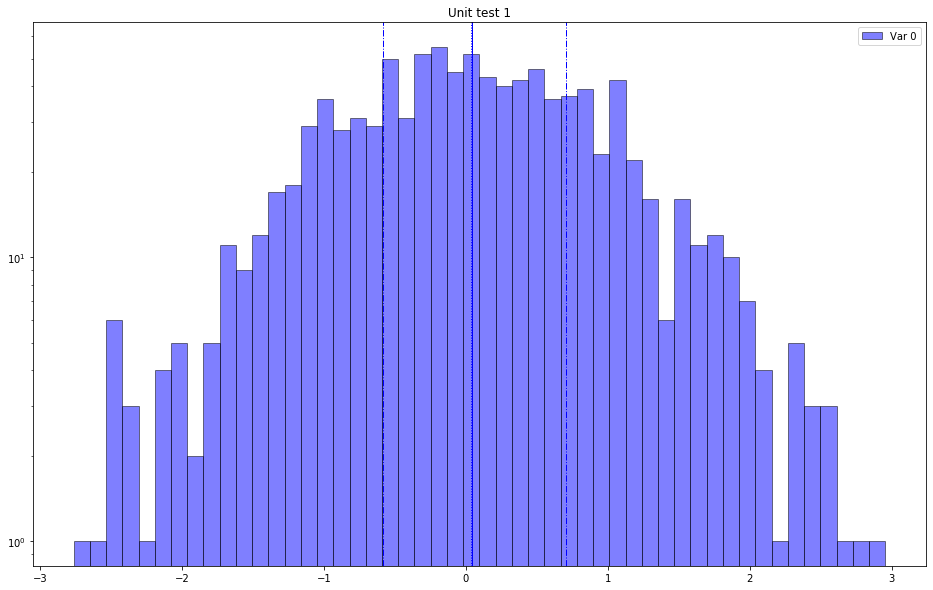

In [54]:
# Input data

list_dist = [np.random.normal(0,1,1000)]

list_encabezados = []

bin_size = 50

# Call to function

objeto_matplotlib = histo_creation(list_dist, list_encabezados, bin_size, title="Unit test 1")

# Outcome

objeto_matplotlib.show()

## Definir unit tests 2

[INFO] Creando el histograma para: ['Random between 0 and 15', 'Normal distribution with average 0 and sigma 1', 'Logistic distribution', 'Binomial distribution', 'Weibull distribution']


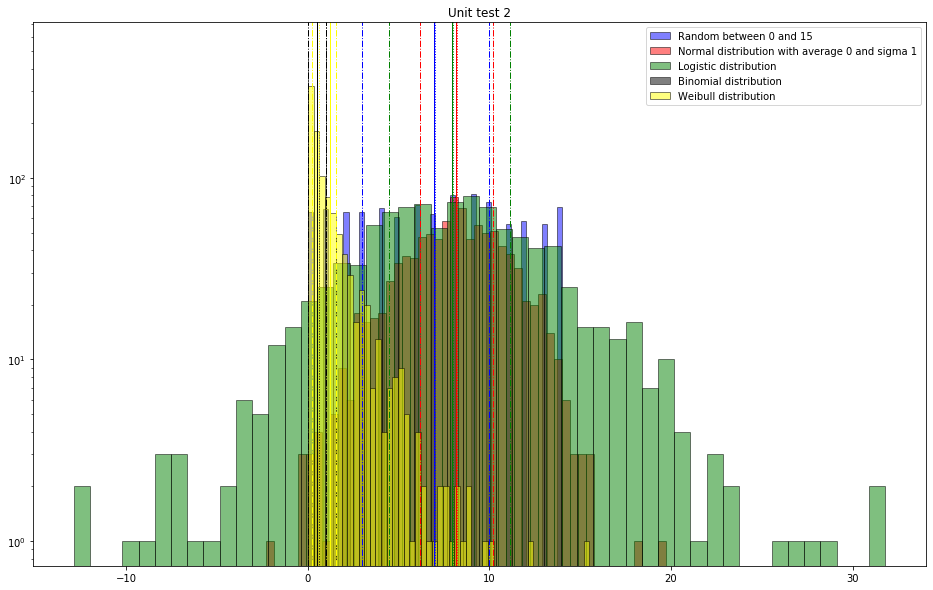

In [58]:
# Input data

list_dist = [np.random.randint(0,15,size=1000),
             np.random.normal(8,3,1000),
             np.random.logistic(8,3,1000),
             np.random.binomial(1, 0.5, 1000),
             np.random.weibull(0.75,1000) ]

list_encabezados = ["Random between 0 and 15", 
                    "Normal distribution with average {} and sigma {}".format(0,1), 
                    "Logistic distribution", 
                    "Binomial distribution",
                    "Weibull distribution"]

bin_size = 50

# Call to function

objeto_matplotlib = histo_creation(list_dist, list_encabezados, bin_size, title="Unit test 2")

# Outcome

objeto_matplotlib.show()